In [115]:
import pandas as pd
df = pd.read_csv('1y apple.csv')
type(df)

pandas.core.frame.DataFrame

In [116]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [117]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')
#conversion en date pour la colone date

In [118]:
df.set_index('Date', inplace=True)

In [119]:
#on met toutes les données en float
for k in df: 
    if df[k].dtype == 'O':
        df[k]=df[k].str.replace('$','').astype(float)


In [120]:
df.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [121]:
#données par mois
df.resample('m').sum()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2018-10-31,54.7150,152067240,54.2200,55.1125,54.1550
2018-11-30,1003.9875,3808828080,1007.0525,1018.2337,990.6775
2018-12-31,780.2650,3557153840,784.9050,794.7700,768.9825
2019-01-31,809.3725,3282131400,806.4450,816.5350,797.7252
2019-02-28,815.7075,1882423520,814.1125,821.1867,810.0266
...,...,...,...,...,...
2023-06-30,3869.9500,1297863400,3857.2500,3894.1960,3834.9257
2023-07-31,3848.2300,996257010,3850.1250,3878.5359,3824.3700
2023-08-31,4164.9250,1323817310,4172.5440,4203.7494,4132.5307


In [122]:
dfnew=df.drop('Volume', axis=1)#on enlève volume qui n'a pas le même ordre de grandeur

<Axes: xlabel='Date'>

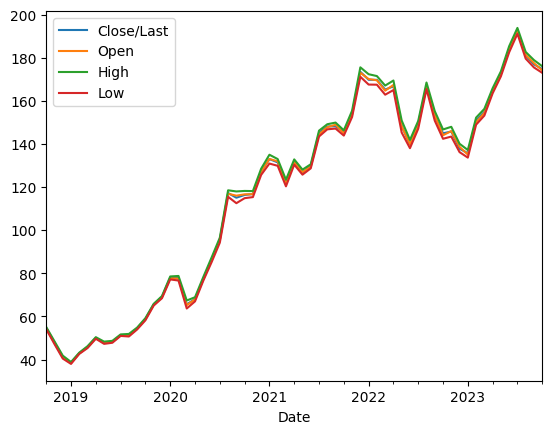

In [123]:
dfnew.resample('1m').mean().plot() #on affiche les données par mois

In [67]:
# petit code pour selectionner une durée 

#df.reset_index(inplace=True)
#defnew2=df[(df['Date'].dt.year >2020) & (df['Date'].dt.year < 2022)]
#defnew2.set_index('Date', inplace=True)
#defnew2.resample('1m').mean().plot()

ValueError: cannot insert level_0, already exists

In [126]:
#nouvelle data frame pour calculer les variations journalières

dh=dfnew.reset_index()
L=[]
for column in dfnew:
    h=[0]
    for i in range(dh.shape[0]-1):  
      h.append(dh.loc[i+1,column]-dh.loc[i,column])
    L.append(h)
L=np.array(L) 
L=np.transpose(L)


In [132]:
#conversion array dataframe
variation=pd.DataFrame(L, columns=dfnew.columns)

In [139]:
#on se met  dans le cadre des jousr de la semaine
dayofweek = pd.DatetimeIndex(variation).dayofweek

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [145]:
##on crée un indice pour les jours de la semaine
h=dfnew.reset_index()
dayofweek =h['Date'].dt.dayofweek

In [151]:
variation.set_index(dayofweek, inplace=True)

In [154]:
## il n'y a que  jours pour la bourse
variation.index.unique()

Index([0, 4, 3, 2, 1], dtype='int32', name='Date')

<Axes: xlabel='Date'>

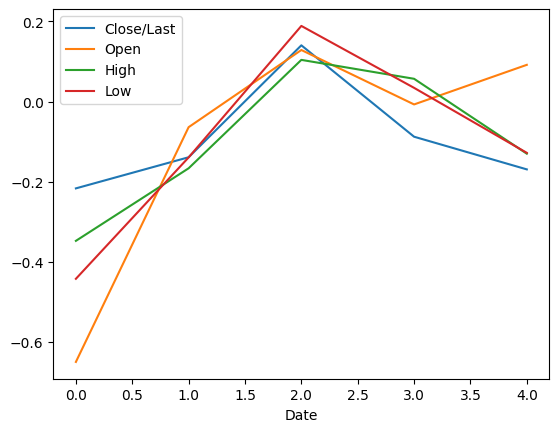

In [157]:
###on regarde en suite la moyenne des varaitions journalières sur toute la durée regroupés par jours de la semaine
variation.groupby(variation.index).mean().plot()